# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | beroroha
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | nur-sultan
Processing Record 4 of Set 1 | portland
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | tazacorte
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | masterton
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | verkhotur'ye
Processing Record 17 of Set 1 | uvarovo
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | chonchi
Processing Record 20 of Set 1 | beohari
Processing Record 21 of Set 1 | 'ibri

Processing Record 37 of Set 4 | north side
Processing Record 38 of Set 4 | zaozersk
Processing Record 39 of Set 4 | sola
Processing Record 40 of Set 4 | nueva gerona
Processing Record 41 of Set 4 | enewetak
Processing Record 42 of Set 4 | quellon
Processing Record 43 of Set 4 | buurhakaba
Processing Record 44 of Set 4 | rongelap
Processing Record 45 of Set 4 | omdurman
Processing Record 46 of Set 4 | whitehorse
Processing Record 47 of Set 4 | chibougamau
Processing Record 48 of Set 4 | kattivakkam
Processing Record 49 of Set 4 | khovd
Processing Record 0 of Set 5 | kingston
Processing Record 1 of Set 5 | copiapo
Processing Record 2 of Set 5 | ha'il
Processing Record 3 of Set 5 | aasiaat
Processing Record 4 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 5 of Set 5 | weno
Processing Record 6 of Set 5 | mogadishu
Processing Record 7 of Set 5 | san agustin de valle fertil
Processing Record 8 of Set 5 | qarshi
Processing Record 9 of Set 5 | guajara mirim
Processi

Processing Record 32 of Set 8 | gladewater
Processing Record 33 of Set 8 | el bolson
Processing Record 34 of Set 8 | tocopilla
Processing Record 35 of Set 8 | lhasa
Processing Record 36 of Set 8 | yucheng
Processing Record 37 of Set 8 | nagqu
Processing Record 38 of Set 8 | rawson
Processing Record 39 of Set 8 | puerto montt
Processing Record 40 of Set 8 | vila velha
Processing Record 41 of Set 8 | anadyr
Processing Record 42 of Set 8 | wuhai
Processing Record 43 of Set 8 | bonthe
Processing Record 44 of Set 8 | kirillov
Processing Record 45 of Set 8 | farkhar
Processing Record 46 of Set 8 | brady
Processing Record 47 of Set 8 | kalabo
Processing Record 48 of Set 8 | krasnoyilsk
City not found. Skipping...
Processing Record 49 of Set 8 | nadym
Processing Record 0 of Set 9 | ternate
Processing Record 1 of Set 9 | samraong
Processing Record 2 of Set 9 | kuraymah
Processing Record 3 of Set 9 | veinticinco de mayo
Processing Record 4 of Set 9 | alpena
Processing Record 5 of Set 9 | big spr

Processing Record 22 of Set 12 | katsuren-haebaru
Processing Record 23 of Set 12 | nombre de dios
Processing Record 24 of Set 12 | la gi
Processing Record 25 of Set 12 | revelstoke
Processing Record 26 of Set 12 | aldama
Processing Record 27 of Set 12 | kamloops
Processing Record 28 of Set 12 | puerto aysen
Processing Record 29 of Set 12 | arno
Processing Record 30 of Set 12 | bakanas
Processing Record 31 of Set 12 | kimbo
Processing Record 32 of Set 12 | xudat
Processing Record 33 of Set 12 | barra de santo antonio
Processing Record 34 of Set 12 | frontera
Processing Record 35 of Set 12 | ponoka
Processing Record 36 of Set 12 | berdigestyakh
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beroroha,-21.6667,45.1667,29.22,43,66,4.83,MG,1701712279
1,grytviken,-54.2811,-36.5092,1.70,63,55,6.17,GS,1701712147
2,nur-sultan,51.1801,71.4460,-3.03,80,100,7.00,KZ,1701712280
3,portland,45.5234,-122.6762,16.30,91,100,7.60,US,1701711660
4,papatowai,-46.5619,169.4708,5.94,78,1,0.82,NZ,1701712167


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,beroroha,-21.6667,45.1667,29.22,43,66,4.83,MG,1701712279
1,grytviken,-54.2811,-36.5092,1.70,63,55,6.17,GS,1701712147
2,nur-sultan,51.1801,71.4460,-3.03,80,100,7.00,KZ,1701712280
3,portland,45.5234,-122.6762,16.30,91,100,7.60,US,1701711660
4,papatowai,-46.5619,169.4708,5.94,78,1,0.82,NZ,1701712167


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

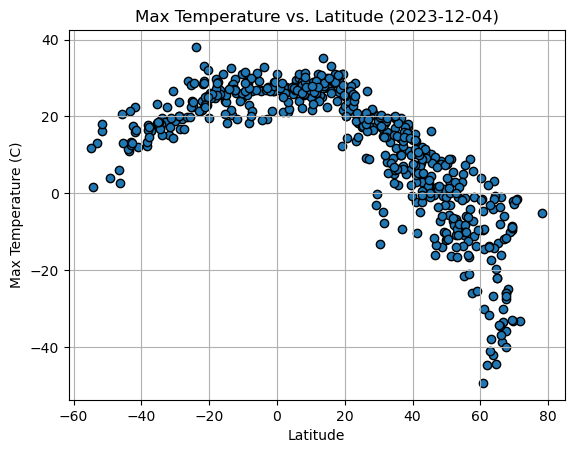

In [8]:
# Build scatter plot for latitude vs. temperature
lat_scatter = city_data_df['Lat']
temp_scatter = city_data_df['Max Temp']
lat_temp_scatter = plt.scatter(lat_scatter, temp_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties
import datetime
unix_time = city_data_df['Date'].median()
time_converting = datetime.datetime.fromtimestamp(unix_time)
figure_date = time_converting.strftime('%Y-%m-%d')
title = f'Max Temperature vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

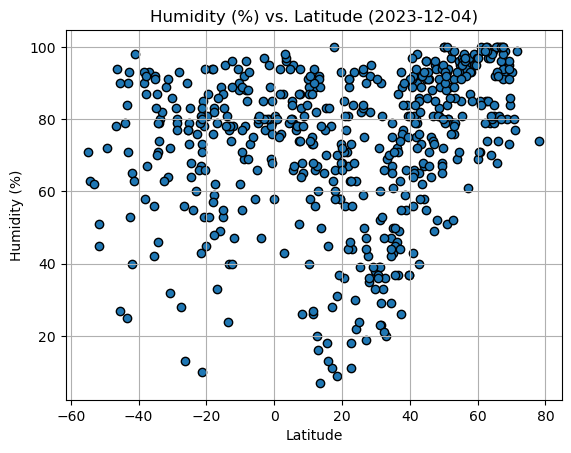

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity_scatter = city_data_df['Humidity']
lat_humidity_scatter = plt.scatter(lat_scatter, humidity_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties
title = f'Humidity (%) vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

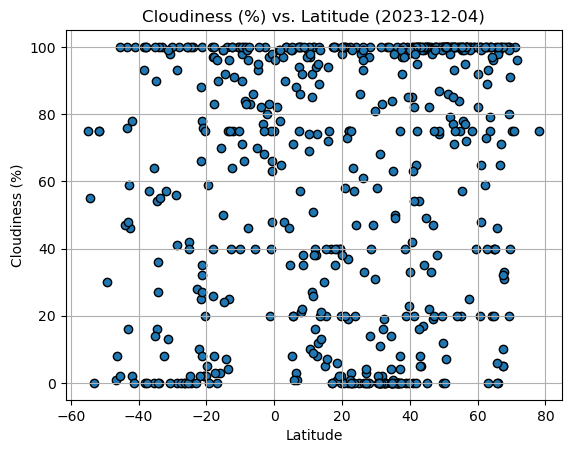

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness_scatter = city_data_df['Cloudiness']
lat_cloud_scatter = plt.scatter(lat_scatter, cloudiness_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties
title = f'Cloudiness (%) vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

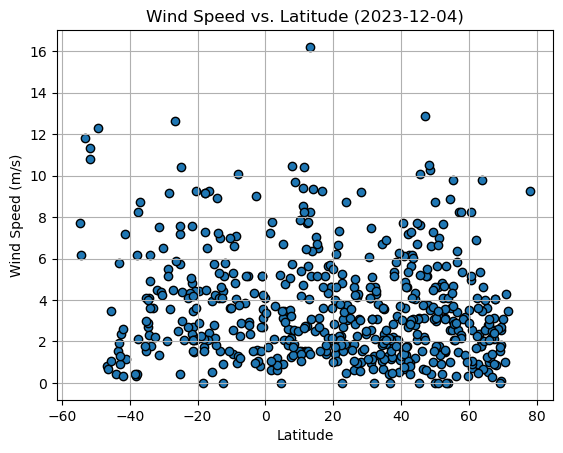

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_scatter = city_data_df['Wind Speed']
lat_wind_scatter = plt.scatter(lat_scatter, wind_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties

title = f'Wind Speed vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_value = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    yplacement = y.max()-((y.max()-y.min())/10)
    xplacement = x.min()+((x.max()-x.min())/10)
    return plt.scatter(x,y,alpha=0.5),plt.plot(x, regress_value, "r-"), plt.annotate(line_eq, (xplacement,yplacement), fontsize=12, color='red', weight='bold'), print(f'The r-value is: {rvalue}')
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nur-sultan,51.1801,71.4460,-3.03,80,100,7.00,KZ,1701712280
3,portland,45.5234,-122.6762,16.30,91,100,7.60,US,1701711660
5,tazacorte,28.6290,-17.9293,20.54,95,40,1.54,ES,1701712167
8,longyearbyen,78.2186,15.6401,-5.09,74,75,9.26,SJ,1701712170
12,yellowknife,62.4560,-114.3525,-13.71,85,100,4.12,CA,1701712151


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,beroroha,-21.6667,45.1667,29.22,43,66,4.83,MG,1701712279
1,grytviken,-54.2811,-36.5092,1.70,63,55,6.17,GS,1701712147
4,papatowai,-46.5619,169.4708,5.94,78,1,0.82,NZ,1701712167
6,adamstown,-25.0660,-130.1015,22.50,79,42,5.74,PN,1701712144
7,masterton,-40.9597,175.6575,12.16,98,100,1.17,NZ,1701712280


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8722338584405206


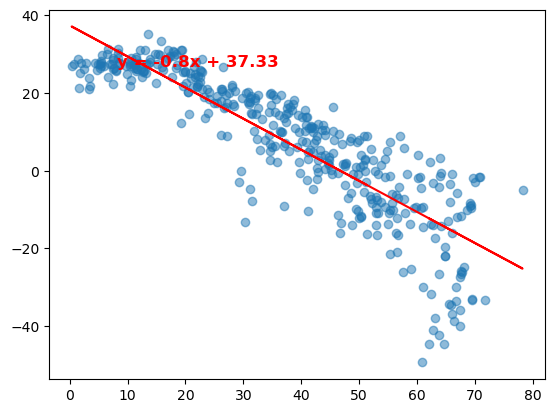

In [15]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.show()

The r-value is: 0.7512490574119365


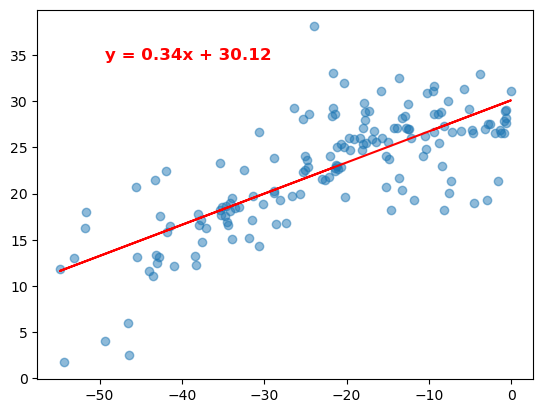

In [16]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.show()

**Discussion about the linear relationship:**   
For the Northern Hemisphere, the high 'r' value indicates a strong negative correlation of Max Temperatures and Latitude.
For the Southern Hemisphere, the 'r' value indicates a moderate positive correlation of Max Temperature and Latitude.  

There appears to be linear correlations of max tempertures and latitudes after separting datapoints above and below the equator, with max temperature for both hemispheres increasing as the datapoints approach the equator.  With some confidence, max temperature could be determined using latitude measurements and the linear regression equation. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.37691383028768677


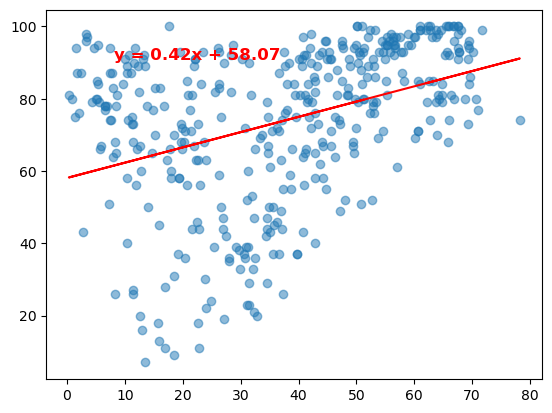

In [17]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.show()

The r-value is: 0.12352456824976361


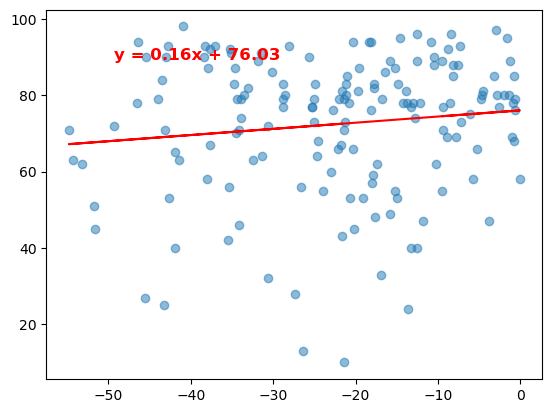

In [18]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.show()

**Discussion about the linear relationship:**  
The 'r' value for the Northern Hemisphere when comparing Latitude and Humidity is at 0.37. This indicates a potentially weak correlation of Latitude and Humidity in the Northern Hemisphere.
The 'r' value for the Southern Hemisphere when comparing Latitude and Humidity is below 0.3, indicating no or a very weak correlation.
Latitude and Humidity do not have a strong linear relationship, therefore it would be difficult to determine humidity based on Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.19376944311930677


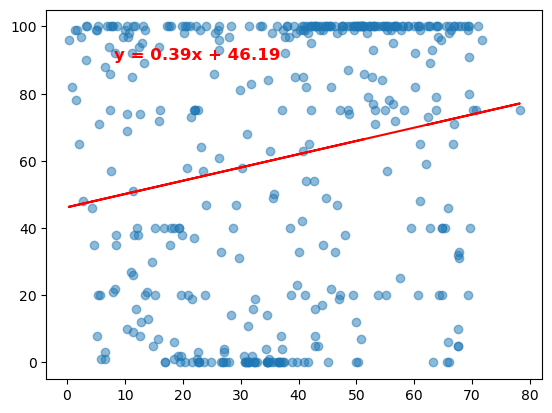

In [19]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.show()

The r-value is: 0.2649110269403057


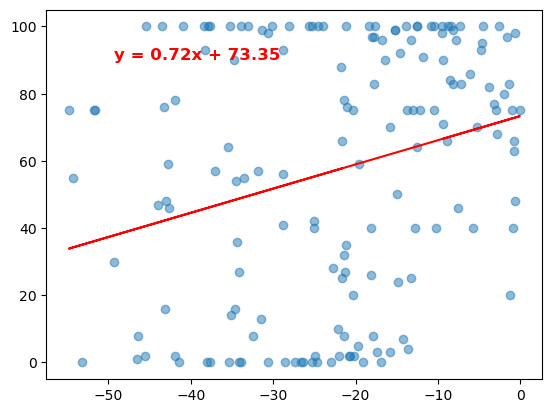

In [20]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.show()

**Discussion about the linear relationship:**  
The 'r' values for both the Northern and Southern Hemisphere, when comparing Latitude and Cloudiness, are less than 0.3. This indicates no or a very weak correlation of Latitude and Cloudiness. Latitude and Cloudiness do not appear to have a linear relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.10662308471121378


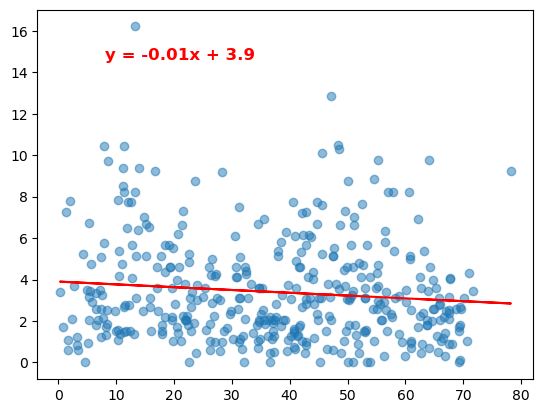

In [21]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.show()

The r-value is: -0.11526569747936943


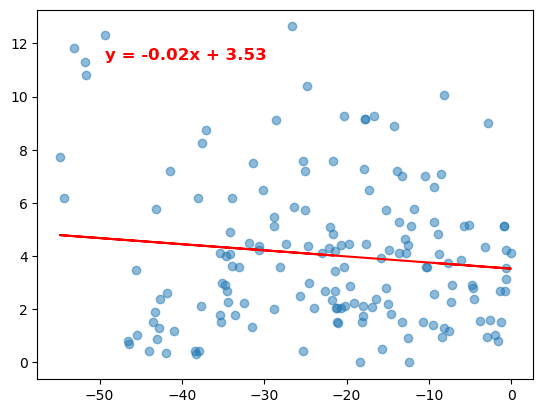

In [22]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.show()

**Discussion about the linear relationship:**  
The 'r' values for both the Northern and Southern Hemisphere, when comparing Latitude and Wind Speed, are less than 0.3. This indicates no or a very weak correlation of Latitude and Wind Speed.  Latitude and Wind Speed do not appear to have a linear relationship. 